In [5]:

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1MxmEN1_WaoFdkEb2Q8kSNuoFIENycq_d' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1MxmEN1_WaoFdkEb2Q8kSNuoFIENycq_d" -O Prices.csv && rm -rf /tmp/cookies.txt 


--2020-07-19 12:47:53--  https://docs.google.com/uc?export=download&confirm=&id=1MxmEN1_WaoFdkEb2Q8kSNuoFIENycq_d
Resolving docs.google.com (docs.google.com)... 172.217.203.101, 172.217.203.139, 172.217.203.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-c4-docs.googleusercontent.com/docs/securesc/ehl1qptgla6a20rulio9h1dho72kp79j/6b5dnf2is06ehipmrrnmnflcb6pn4uvb/1595162850000/12658370844904056869/09113684580772024507Z/1MxmEN1_WaoFdkEb2Q8kSNuoFIENycq_d?e=download [following]
--2020-07-19 12:47:55--  https://doc-08-c4-docs.googleusercontent.com/docs/securesc/ehl1qptgla6a20rulio9h1dho72kp79j/6b5dnf2is06ehipmrrnmnflcb6pn4uvb/1595162850000/12658370844904056869/09113684580772024507Z/1MxmEN1_WaoFdkEb2Q8kSNuoFIENycq_d?e=download
Resolving doc-08-c4-docs.googleusercontent.com (doc-08-c4-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connectin

Data loading

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
datasets = pd.read_csv('Prices.csv')
print(datasets.head)

<bound method NDFrame.head of               date symbol        open  ...         low        high     volume
0       2016-01-05   WLTW  123.430000  ...  122.309998  126.250000  2163600.0
1       2016-01-06   WLTW  125.239998  ...  119.940002  125.540001  2386400.0
2       2016-01-07   WLTW  116.379997  ...  114.930000  119.739998  2489500.0
3       2016-01-08   WLTW  115.480003  ...  113.500000  117.440002  2006300.0
4       2016-01-11   WLTW  117.010002  ...  114.089996  117.330002  1408600.0
...            ...    ...         ...  ...         ...         ...        ...
851259  2016-12-30    ZBH  103.309998  ...  102.849998  103.930000   973800.0
851260  2016-12-30   ZION   43.070000  ...   42.689999   43.310001  1938100.0
851261  2016-12-30    ZTS   53.639999  ...   53.270000   53.740002  1701200.0
851262  2016-12-30    AIV   44.730000  ...   44.410000   45.590000  1380900.0
851263  2016-12-30    FTV   54.200001  ...   53.389999   54.480000   705100.0

[851264 rows x 7 columns]>


Data visualization

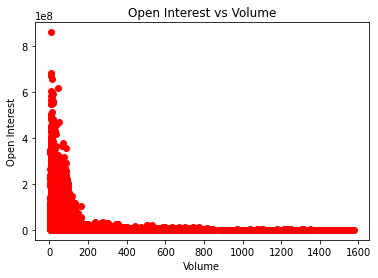

In [21]:
X = datasets.iloc[:, [3]].values
Y = datasets.iloc[:, 6].values

plt.title('Open Interest vs Volume')
plt.ylabel('Open Interest')
plt.xlabel('Volume')
plt.scatter(X, Y, color = 'red')

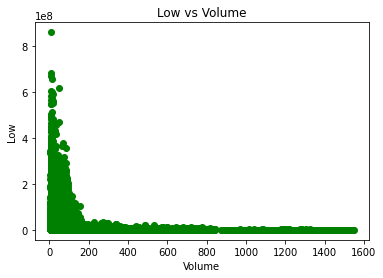

In [22]:
X = datasets.iloc[:, [4]].values
Y = datasets.iloc[:, 6].values

plt.title('Low vs Volume')
plt.ylabel('Low')
plt.xlabel('Volume')
plt.scatter(X, Y, color = 'green')

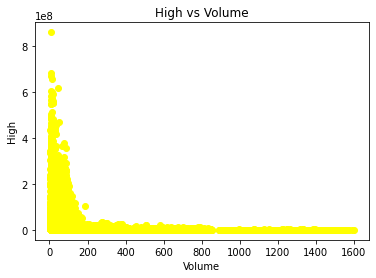

In [23]:
X = datasets.iloc[:, [5]].values
Y = datasets.iloc[:, 6].values

plt.title('High vs Volume')
plt.ylabel('High')
plt.xlabel('Volume')
plt.scatter(X, Y, color = 'yellow')

In [41]:
from sklearn.decomposition import FactorAnalysis
X = datasets.iloc[:, [3,4,5,6]]

factor = FactorAnalysis(n_components=15,random_state=0).fit(X)
pd.DataFrame(factor.components_,columns=X.columns)

,close,low,high,volume
0,-9.977324,-9.909554,-10.032439,1.249467e+07
1,74.533565,73.793077,75.236812,3.852729e-04
2,-0.000000,-0.000000,0.000000,-0.000000e+00
3,-0.000000,0.000000,0.000000,-0.000000e+00


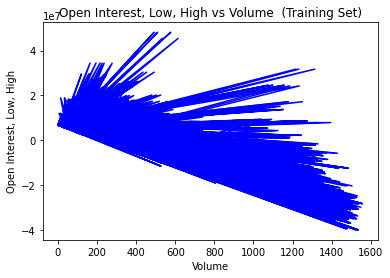

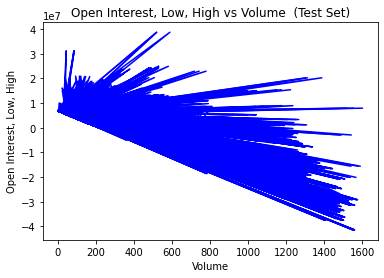

In [18]:
# Simple Linear Regression

X = datasets.iloc[:, [3,4,5]].values
Y = datasets.iloc[:, 6].values

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

# Fitting Simple Linear Regression to the training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

# Predicting the Test set result 

Y_Pred = regressor.predict(X_Test)


# Visualising the Training set results

#plt.scatter(X_Train, Y_Train, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('Open Interest, Low, High vs Volume  (Training Set)')
plt.ylabel('Open Interest, Low, High')
plt.xlabel('Volume')
plt.show()

# Visualising the Test set results

#plt.scatter(X_Train, Y_Train, color = 'red')
plt.plot(X_Test, regressor.predict(X_Test), color = 'blue')
plt.title('Open Interest, Low, High vs Volume  (Test Set)')
plt.ylabel('Open Interest, Low, High')
plt.xlabel('Volume')
plt.show()